In [1]:
library(dplyr)
library(ggplot2)
library(reshape2)
library(Matrix)
library(stringr)
library(ggsci)
library(cowplot)
library(RColorBrewer)
library(colorspace)
library(ggthemes)
library(scales)
library(ggrepel)

options(repr.plot.width=50, repr.plot.height=10)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘ggthemes’


The following object is masked from ‘package:cowplot’:

    theme_map





***Figure 1C***


In [11]:
#Import the metadata from the complete object (covid_total.obs[['sample_id', 'initial_clustering', 'Sex', 'Age', 'Site', 'Status',
#                'Status_on_day_collection_summary']].to_csv('initial_clustering_for_stats.csv')

setwd("/home/ngr18/covid/")
prolif<-read.csv("proportions_initial_with_site.csv", row.names = 1)

In [12]:
prolif <- prolif %>% dplyr::group_by(sample_id, Status_on_day_collection_summary) %>%
  dplyr::mutate(sample_total = n())

prolif <- prolif %>% dplyr::group_by(sample_id, initial_clustering) %>% dplyr::mutate(cell_total = n())

df<-prolif %>% distinct(initial_clustering, Status_on_day_collection_summary,
                             sample_total, cell_total) %>% mutate(freq = cell_total/sample_total)

colnames(df)<-c("patient_id", "celltype", "diagnosis",  "sample_total", "cell_total", "freq")

In [13]:
df<-df %>% group_by(celltype, diagnosis) %>% 
summarise(average_props = mean(freq))

`summarise()` regrouping output by 'celltype' (override with `.groups` argument)



In [14]:
df<-df[!df$diagnosis == "Non_covid",]

In [15]:
df$diagnosis <- factor(df$diagnosis, levels = c("Healthy","Asymptomatic",  "Mild", 
                                              "Moderate", "Severe", "Critical", "LPS_90m", "LPS_10h"))

df$celltype <- factor(df$celltype, levels = c("CD4", "Treg", "CD8",  "gdT","MAIT",
                                              "NK_16hi", "NK_56hi",
                                              "B_cell", "Plasmablast",
                                              "CD14", "CD16", "DCs","pDC",  "HSC", "Platelets", "RBC",
                                              "Lymph_prolif","Mono_prolif"))

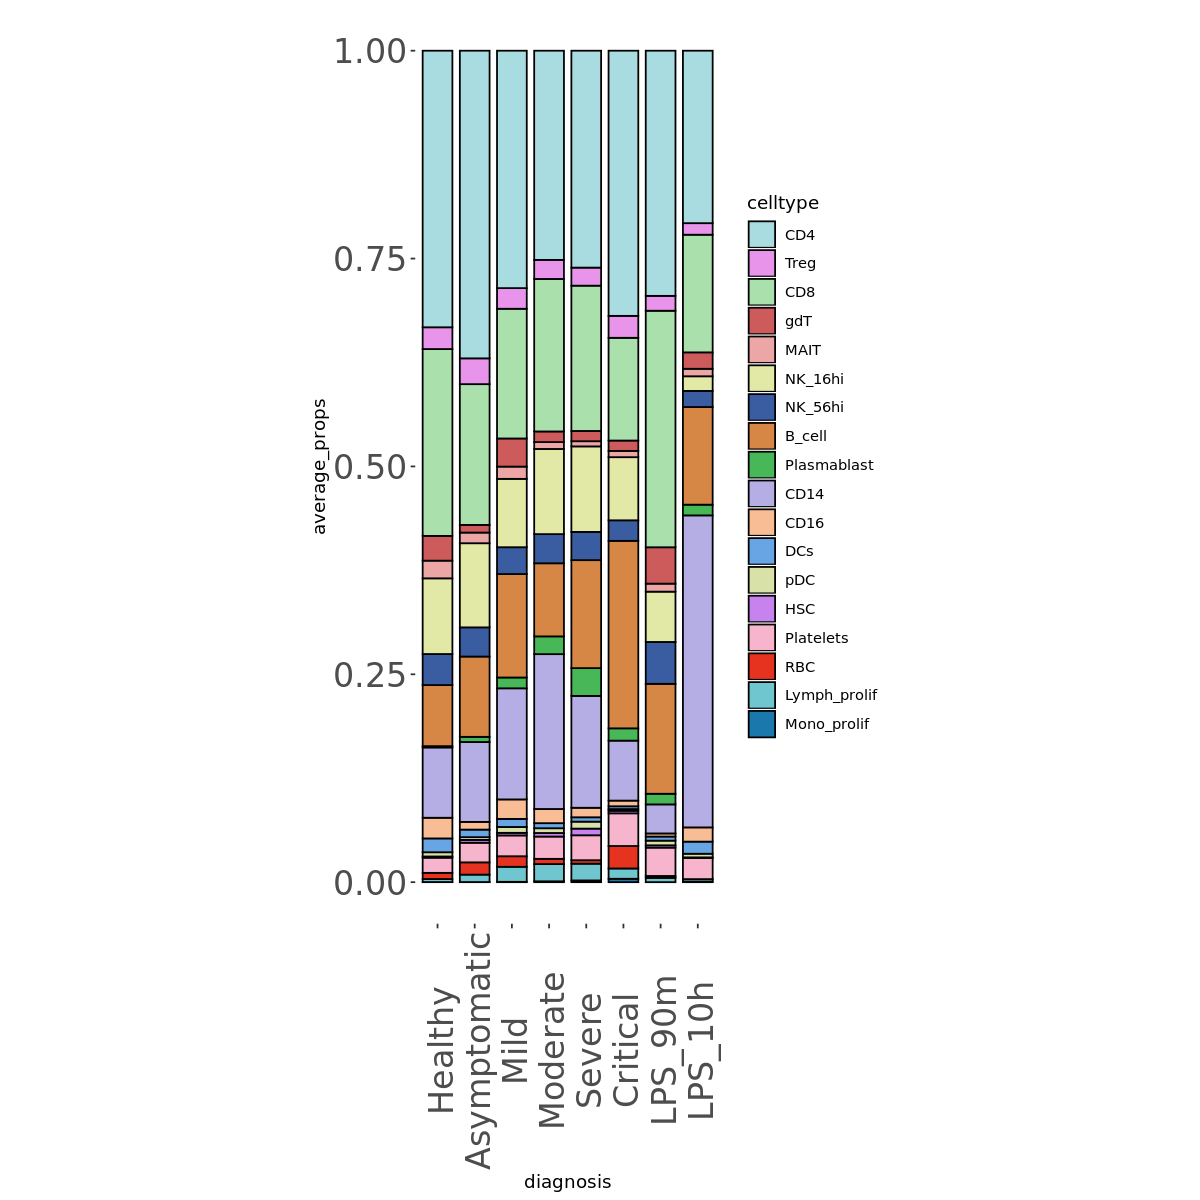

In [16]:
options(repr.plot.width=10, repr.plot.height=10)

ggplot(df, aes(x=diagnosis, y = average_props, fill=celltype))+ 
    geom_bar(position="fill", stat="identity", width = 0.8, colour = "black")+

  theme(axis.text.x = element_text(angle=65, vjust=0.6))+
      theme(aspect.ratio = 3/1)+ 
  theme(axis.text.x = element_text(angle = 90, size = 20))+
theme(axis.text.y = element_text(size = 20)) +
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background= element_blank())+
scale_fill_manual(values = c('#A9DCE0','#E794EA', '#A9E0AB', '#CE5B5B', '#EDA6A6', '#E2E8A6', '#3A5CA0', '#D68645', '#48B758', 
'#B4AEE5', '#F9BD95', '#67a5e5', '#d8e1a7', '#C683ED', '#F7B5CD', '#E53320', '#6FC6CE', '#1B78AC'))


***Myeloid proportions figure 2B***


In [17]:
#Import the metadata from the full scanpy object filtered for myeloid populations

setwd("/home/ngr18/covid")
prolif<-read.csv("myeloid_clustering_for_stats.csv", row.names = 1)

In [18]:
#Exclude Cambridge samples

prolif<-prolif[!prolif$Site == "Cambridge",]
prolif<-prolif[!prolif$Status_on_day_collection_summary == "Asymptomatic",]

In [19]:
prolif <- prolif %>% dplyr::group_by(sample_id, Status_on_day_collection_summary) %>%
  dplyr::mutate(sample_total = n())

prolif <- prolif %>% dplyr::group_by(sample_id, full_clustering) %>% dplyr::mutate(cell_total = n())

df<-prolif %>% distinct(full_clustering, Status_on_day_collection_summary,
                             sample_total, cell_total) %>% mutate(freq = cell_total/sample_total)

colnames(df)<-c("patient_id", "celltype", "diagnosis",  "sample_total", "cell_total", "freq")

df<-df %>% group_by(celltype, diagnosis) %>% 
summarise(average_props = mean(freq))

df$diagnosis <- factor(df$diagnosis, levels = c("Healthy",  "Mild", 
                                              "Moderate", "Severe", "Critical", "LPS_90mins", "LPS_10hours"))

df$celltype <- factor(df$celltype, levels = c('DC1', 'DC2', 'DC3', 'ASDC', 'pDC', 'DC_prolif','CD83_CD14_mono',
'CD14_mono',  'CD16_mono', 'C1_CD16_mono', 'Mono_prolif'))

`summarise()` regrouping output by 'celltype' (override with `.groups` argument)



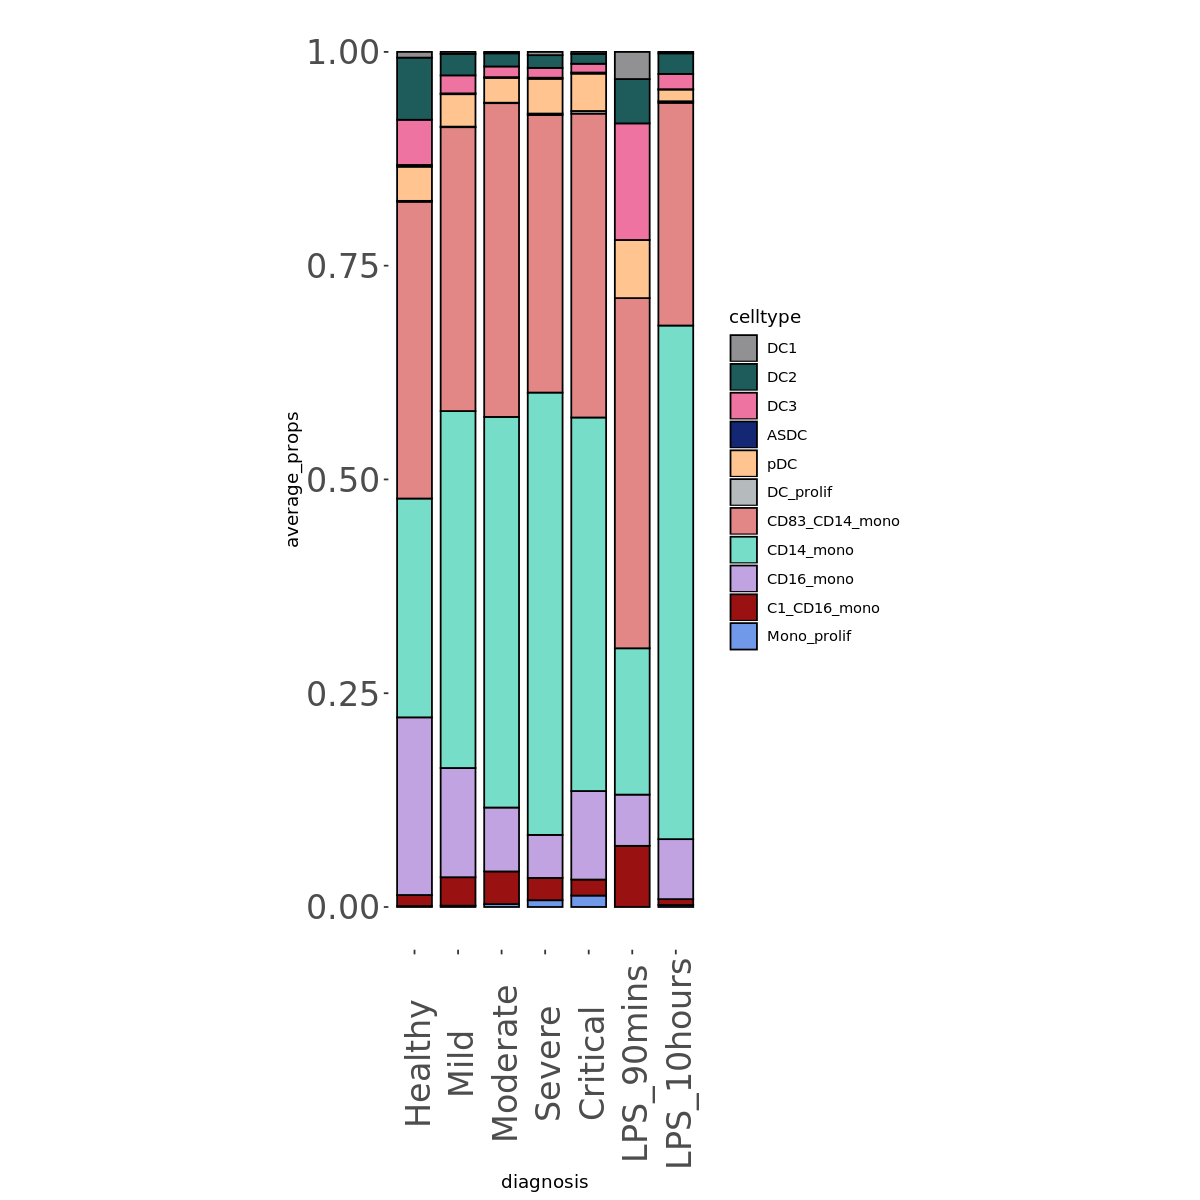

In [20]:
options(repr.plot.width=10, repr.plot.height=10)

ggplot(df, aes(x=diagnosis, y = average_props, fill=celltype))+ 
    geom_bar(position="fill", stat="identity", width = 0.8, colour = "black")+

  theme(axis.text.x = element_text(angle=65, vjust=0.6))+
      theme(aspect.ratio = 3/1)+ 
  theme(axis.text.x = element_text(angle = 90, size = 20))+
theme(axis.text.y = element_text(size = 20)) +
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background= element_blank())+
scale_fill_manual(values = c('#919093', '#1E5B5B', '#ef73a0', '#142775','#FFC48F', '#b5babc',
          '#E28686', '#76DDC9', '#C2A3E2', '#991111',
         '#7199EA'))

setwd("/home/ngr18/covid/figures")
ggsave("myeloid_proportions.pdf", plot = last_plot(), device = NULL, path = NULL,width = 12, height = 12,scale = 1)

In [ ]:

***HSC proportions - figure 2J***


In [ ]:
#import the metadata in to R - HSC[['sample_id', 'HSC_clusters', 'Sex', 'Age', 'Site', 'Status',
#                'Status_on_day_collection_summary']].to_csv('HSC_clustering_for_stats.csv')

setwd("/home/ngr18/covid/")
prolif<-read.csv("HSC_clustering_for_stats.csv", row.names = 1)

In [ ]:
prolif <- prolif %>% dplyr::group_by(sample_id, Status_on_day_collection_summary) %>%
  dplyr::mutate(sample_total = n())

prolif <- prolif %>% dplyr::group_by(sample_id, HSC_clusters) %>% dplyr::mutate(cell_total = n())

df<-prolif %>% distinct(HSC_clusters, Status_on_day_collection_summary,
                             sample_total, cell_total) %>% mutate(freq = cell_total/sample_total)

colnames(df)<-c("patient_id", "celltype", "diagnosis",  "sample_total", "cell_total", "freq")

df<-df %>% group_by(celltype, diagnosis) %>% 
summarise(average_props = mean(freq))

df<-prolif %>%
  dplyr::group_by(sample_id, Status_on_day_collection_summary, HSC_clusters) %>%
  dplyr::summarise(total = n())%>%
  dplyr::mutate(freq = total / sum(total))

colnames(df)<-c("patient_id", "diagnosis","celltype", "total", "freq")

df<-df %>% dplyr::group_by(diagnosis, celltype) %>% dplyr::summarise(mean = mean(freq))

df$diagnosis <- factor(df$diagnosis, levels = c("Healthy","Asymptomatic",  "Mild", 
                                              "Moderate", "Severe", "Critical"))

df$celltype <- factor(df$celltype, levels = c("CD38neg", "CD38pos", 'Erythroid', 'Myeloid', 'MK', 'Prolif'))

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)

ggplot(df, aes(x=diagnosis, y = mean, fill=celltype))+ 
    geom_bar(position="fill", stat="identity", width = 0.8, colour = "black")+

  theme(axis.text.x = element_text(angle=65, vjust=0.6))+
      theme(aspect.ratio = 3/1)+ 
  theme(axis.text.x = element_text(angle = 90, size = 20))+
theme(axis.text.y = element_text(size = 20)) +
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background= element_blank())+
scale_fill_manual(values = c('#A9DCE0','#E794EA', '#A9E0AB', '#CE5B5B', '#EDA6A6', '#E2E8A6', '#3A5CA0', '#D68645', '#48B758', 
'#B4AEE5', '#F9BD95', '#67a5e5', '#d8e1a7', '#C683ED', '#F7B5CD', '#E53320', '#6FC6CE', '#1B78AC'))

setwd("/home/ngr18/covid/figures")
ggsave("HSC_proportions.pdf", plot = last_plot(), device = NULL, path = NULL,width = 12, height = 12,scale = 1)